In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
A=[]
for a in open("A.dat",'r'):
    A.append(a)

In [3]:
A = np.array(A, dtype=float)
A

array([ 24.0465 ,   3.07331, 365.267  , ...,   1.46624, 109.921  ,
         5.33623])

In [4]:
len(A)

60483

In [5]:
norm = np.sum(A)

In [6]:
norm

33131066.216623742

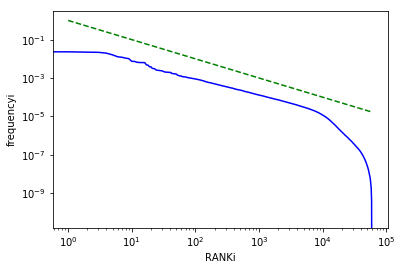

In [7]:
fig = plt.figure()
x = np.arange(1, len(A))
plt.ylabel("frequencyi")
plt.xlabel("RANKi")
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-7,1)
plt.plot(x, 1./x, 'g--')
plt.plot(np.sort(A/norm)[::-1], c='blue')
plt.show()

# Occurrences distribution

In [8]:
O=[]
for o in open("O.dat",'r'):
    O.append(o)

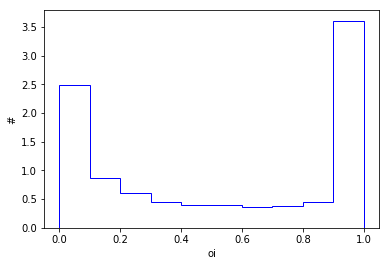

In [9]:
fig=plt.figure()
plt.hist(np.array(O, dtype=float), histtype='step', color='blue', density=True)
plt.xlabel("oi")
plt.ylabel("#")
plt.show()